In [ ]:
import pandas as pd

In [ ]:
dt=pd.read_csv("Play_Tennis.csv")

In [ ]:
dt

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Cool,Normal,Weak,No
1,Rain,Cool,High,Weak,No
2,Rain,Mild,High,Strong,Yes
3,Overcast,Mild,High,Strong,No
4,Overcast,Cool,High,Weak,Yes
...,...,...,...,...,...
995,Overcast,Mild,Normal,Weak,No
996,Rain,Mild,Normal,Weak,Yes
997,Overcast,Hot,Normal,Weak,No
998,Rain,Mild,Normal,Weak,No


In [ ]:
dt.isnull().sum()

,0
Outlook,0
Temperature,0
Humidity,0
Wind,0
Play,0


In [ ]:
dt.shape

(1000, 5)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      1000 non-null   object
 1   Temperature  1000 non-null   object
 2   Humidity     1000 non-null   object
 3   Wind         1000 non-null   object
 4   Play         1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [ ]:
X = dt.drop("Play", axis=1)
y = dt["Play"]

In [ ]:
categorical_features = ["Outlook", "Temperature", "Humidity", "Wind"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

| Outlook  | Sunny | Overcast | Rain |
| -------- | ----- | -------- | ---- |
| Sunny    | 1     | 0        | 0    |
| Rain     | 0     | 0        | 1    |
| Overcast | 0     | 1        | 0    |


 `Step-7: Train-test Split`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import CategoricalNB
# Added imports and definitions for preprocessor and categorical_features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Outlook", "Temperature", "Humidity", "Wind"]
preprocessor = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", CategoricalNB()) # Changed to Categorical Naive Bayes
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Outlook', 'Temperature',
                                                   'Humidity', 'Wind'])])),
                ('classifier', CategoricalNB())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# --- Accuracy, Precision, Recall, F1 Score ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label="Yes")
rec = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")

print("Accuracy:", round(acc, 2))
print("Precision:", round(prec,2))
print("Recall:", round(rec,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.5
Precision: 0.58
Recall: 0.38
F1 Score: 0.46


In [ ]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[58 31]
 [69 42]]


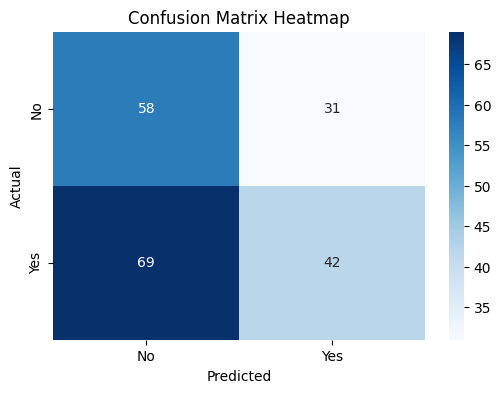

In [ ]:
# --- Confusion Matrix Heatmap ---
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.46      0.65      0.54        89
         Yes       0.58      0.38      0.46       111

    accuracy                           0.50       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.52      0.50      0.49       200



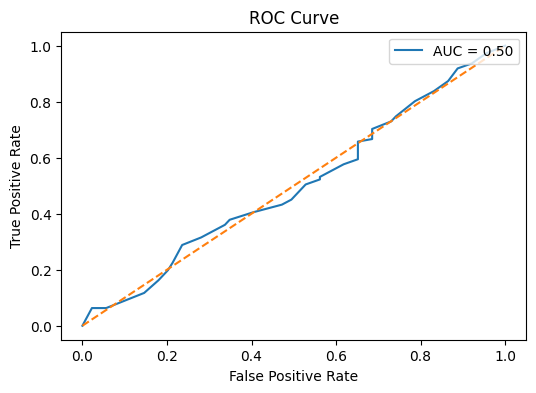

ROC AUC Score: 0.5


In [ ]:
# --- ROC Curve & AUC ---
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Convert Yes/No to 0/1
y_pred_prob = model.predict_proba(X_test)[:,1]  # Probability of "Yes"
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()
print("ROC AUC Score:", round(roc_auc,2))

In [ ]:
# --- Hyperparameter Tuning (GridSearchCV) ---
from sklearn.model_selection import GridSearchCV
# Define a param_grid with hyperparameters valid for CategoricalNB
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
    'classifier__fit_prior': [True, False],
    'classifier__min_categories': [None, 2, 5]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'classifier__alpha': 1.0, 'classifier__fit_prior': True, 'classifier__min_categories': 5}
Best Score: 0.5287499999999999


In [ ]:
# Compute 5-fold cross-validation accuracy on the whole pipeline
# This gives a more reliable estimate of expected performance.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Accuracy (already built-in)
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validation Accuracy (5-fold):', cv_accuracy)
print('Mean CV Accuracy: {:.4f}'.format(cv_accuracy.mean()))

# Precision
precision_scorer = make_scorer(precision_score, pos_label="Yes")
cv_precision = cross_val_score(model, X, y, cv=5, scoring=precision_scorer)
print('Cross-validation Precision (5-fold):', cv_precision)
print('Mean CV Precision: {:.4f}'.format(cv_precision.mean()))

# Recall
recall_scorer = make_scorer(recall_score, pos_label="Yes")
cv_recall = cross_val_score(model, X, y, cv=5, scoring=recall_scorer)
print('Cross-validation Recall (5-fold):', cv_recall)
print('Mean CV Recall: {:.4f}'.format(cv_recall.mean()))

# F1-score
f1_scorer = make_scorer(f1_score, pos_label="Yes")
cv_f1 = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
print('Cross-validation F1-score (5-fold):', cv_f1)
print('Mean CV F1-score: {:.4f}'.format(cv_f1.mean()))

Cross-validation Accuracy (5-fold): [0.48  0.485 0.495 0.445 0.545]
Mean CV Accuracy: 0.4900
Cross-validation Precision (5-fold): [0.43548387 0.46808511 0.47560976 0.42708333 0.54285714]
Mean CV Precision: 0.4698
Cross-validation Recall (5-fold): [0.28125    0.45360825 0.40206186 0.42268041 0.39175258]
Mean CV Recall: 0.3903
Cross-validation F1-score (5-fold): [0.34177215 0.46073298 0.43575419 0.42487047 0.45508982]
Mean CV F1-score: 0.4236


In [ ]:
# Example test sample
new_data = pd.DataFrame({
    "Outlook": ["Sunny"],
    "Temperature": ["Hot"],
    "Humidity": ["High"],
    "Wind": ["Weak"]
})
# Predict
single_pred = model.predict(new_data)
print("Prediction for New Data:", single_pred[0])

Prediction for New Data: No


In [ ]:
proba = model.predict_proba(new_data)
print("Prediction Probabilities:", proba)

Prediction Probabilities: [[0.54531851 0.45468149]]


In [ ]:
new_data2 = pd.DataFrame({
    "Outlook": ["Overcast"],
    "Temperature": ["Cool"],
    "Humidity": ["High"],
    "Wind": ["Weak"]
})
pred2 = model.predict(new_data2)
print("\nPrediction for New Data 2:", pred2[0])

proba2 = model.predict_proba(new_data2)
print("Prediction Probabilities 2:", proba2)


Prediction for New Data 2: Yes
Prediction Probabilities 2: [[0.36340345 0.63659655]]


In [ ]:
# --- Save the Model ---
import joblib
joblib.dump(model, "naive_bayes_playtennis.pkl")

['naive_bayes_playtennis.pkl']